# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

In [3]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

#import packages

import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd


In [4]:
model = inauguralproject.inauguralproject()

In [9]:
#create list with new values of alpha and solve
al = [0.25, .5, .75]
#create list with new values of sigma and solve
sl = [0.5, 1, 1.5]
optm = np.zeros([3,3])
for it, a in enumerate(al):
    model.par.alpha = a

    for jt, s in enumerate(sl):
        model.par.sigma = s
        opt = model.solve_discrete()
        optm[it, jt] = opt.HM/opt.HF
print(optm)




c:\Users\Yas\Documents\Uni\Vorlesungen\2023FS\Programming\projects-2023-newteam-1\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = (1- par.alpha)*HM**((par.sigma -1)/par.sigma)+ par.alpha*HF**((par.sigma -1)/par.sigma)
c:\Users\Yas\Documents\Uni\Vorlesungen\2023FS\Programming\projects-2023-newteam-1\inauguralproject\inauguralproject.py:65: RuntimeWarning: invalid value encountered in multiply
  Q = C**par.omega*H**(1-par.omega)
C:\Users\Yas\AppData\Local\Temp\ipykernel_10304\3825326437.py:12: RuntimeWarning: invalid value encountered in double_scalars
  optm[it, jt] = opt.HM/opt.HF


[[       nan 3.25       8.        ]
 [       nan 1.         0.8       ]
 [       nan 0.30769231 0.125     ]]


# Question 2

Explain your code and procedure

ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

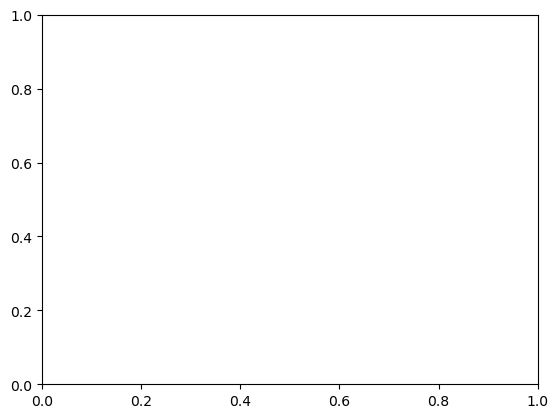

In [45]:
#create list with new values of WF
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#Define log of wf/wm as an array 
ratio_wf_wm = [num / model.par.wM for num in wF_values]
log_WF_WM = np.log(ratio_wf_wm)
    

#define Hf/Hm and convert to an Array S
ratio_hf_hm = opt.HF/opt.HM
log_HF_HM = np.log(ratio_hf_hm)
arr_hf_hm = np.array([])
for i in range(5):
    arr_hf_hm = np.append(arr_hf_hm, log_HF_HM)

# plot 
plt.plot(arr_hf_hm,log_WF_WM)

# Set plot labels and title
plt.xlabel('log of HM/WM')
plt.ylabel('log of WF/WM')
plt.title('Logarithmic plot')

plt.show()

In [46]:
arr_hf_hm


array([2.07944154, 2.07944154, 2.07944154, 2.07944154, 2.07944154])

# Question 3

Explain your code and procedure

In [12]:
def solve(self, do_print=False):
    """ solve model continously """

    par = self.par
    sol = self.sol

    # a. objective function
    def obj(HF):
        HM = optimize.minimize_scalar(lambda HM: -self.calc_utility(HM+HF*par.alpha/(1-par.alpha),HM,HF-par.alpha/(1-par.alpha)*HM,HF),
                                      bounds=(1e-8,24), method='bounded').x
        LM = 24 - HM
        LF = 24 - HF
        return np.log(HF/HM)

    # b. solve for different values of wF
    for i, wF in enumerate(par.wF_vec):
        par.wF = wF
        sol.HF_vec[i] = optimize.minimize_scalar(lambda HF: -obj(HF), bounds=(1e-8,24), method='bounded').x
        sol.HM_vec[i] = optimize.minimize_scalar(lambda HM: -self.calc_utility(HM+sol.HF_vec[i]*par.alpha/(1-par.alpha),HM,sol.HF_vec[i]-par.alpha/(1-par.alpha)*HM,sol.HF_vec[i]),
                                                  bounds=(1e-8,24), method='bounded').x
        sol.LM_vec[i] = 24 - sol.HM_vec[i]
        sol.LF_vec[i] = 24 - sol.HF_vec[i]

    # c. print results
    if do_print:
        for i, wF in enumerate(par.wF_vec):
            print(f"wF = {wF:.2f}, HF = {sol.HF_vec[i]:.4f}, HM = {sol.HM_vec[i]:.4f}")

    

In [ ]:

# plot results


ADD CONCISE CONLUSION.

Question 4 

In [16]:
#choose alpha such that M and W are equally productive
model.par.alpha = 0.5

Question 5